In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [4]:

# Load Dataset
file_path = "customer_purchase_data.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Data Preprocessing
X = df.drop('PurchaseStatus', axis=1)  # Assuming 'Target' is the dependent variable
y = df['PurchaseStatus']

# Standardize the Data
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

# Apply PCA
pca = PCA()  # Creating PCA object
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Explained Variance
print('Explained Variance:', pca.explained_variance_)
print('Proportion of Explained Variance:', pca.explained_variance_ratio_)
print('Cumulative Proportion of Explained Variance:', np.cumsum(pca.explained_variance_ratio_))


Explained Variance: [1.11432784 1.08600162 1.03636328 1.01623201 0.98656988 0.9544077
 0.92840898 0.88302557]
Proportion of Explained Variance: [0.13919812 0.1356597  0.12945905 0.12694432 0.12323902 0.11922143
 0.11597376 0.11030461]
Cumulative Proportion of Explained Variance: [0.13919812 0.27485782 0.40431687 0.53126118 0.65450021 0.77372163
 0.88969539 1.        ]


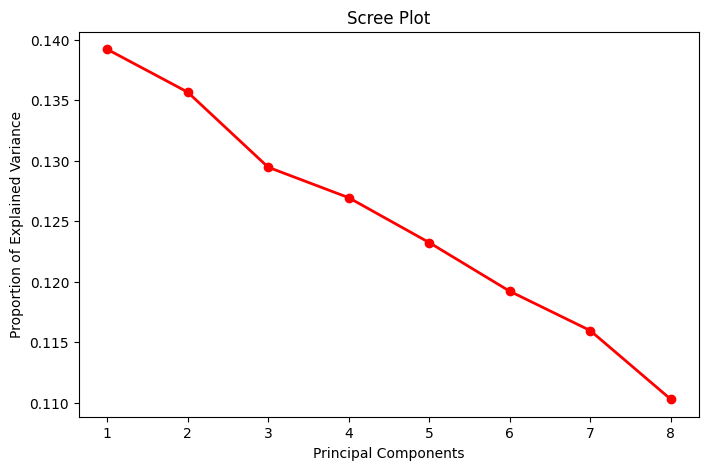

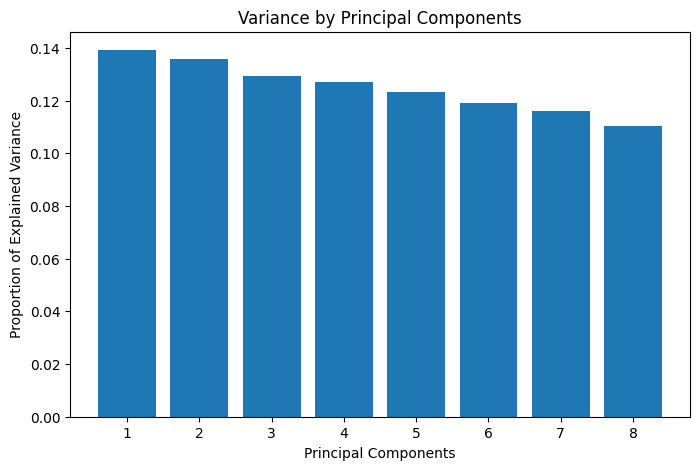

Accuracy: 0.73
Confusion Matrix:
 [[131  41]
 [ 40  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       172
           1       0.68      0.69      0.68       128

    accuracy                           0.73       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.73      0.73       300



In [5]:

# Visualizing Explained Variance
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(8, 5))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.show()

# Bar Plot for Variance
plt.figure(figsize=(8, 5))
plt.bar(PC_values, pca.explained_variance_ratio_)
plt.title("Variance by Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.show()

# Adding PCA components back into the dataset
X_pca['PurchaseStatus'] = y

# Model Training with PCA-reduced data
X_train, X_test, y_train, y_test = train_test_split(X_pca.iloc[:, :3], y, test_size=0.2, random_state=42)

svc = SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)

# Model Evaluation
y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
